Engineer QA Ticket: https://phabricator.wikimedia.org/T346106

Data QA Ticket: https://phabricator.wikimedia.org/T346978

__Data QA on Oct 23, 2023__

In [2]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
library(tidyverse); 
library(lubridate); 
library(scales);
library(magrittr); 
library(dplyr);
})

In [94]:
options(repr.plot.width = 15, repr.plot.height = 10)

# QA a non-default font size in the Minerva skin (On mobile web) 

Discussed with engineer, we will not enable skin field, because MobileWebUIActionsTracking schema only captures sessions in minerva skin.  

In [119]:
query_mobile <- "
SELECT event.action, event.isAnon, event.font,  count(Distinct event.token) AS count_session, count(1) AS events
FROM event.MobileWebUIActionsTracking
WHERE year=2023 and month=10 and day=23
GROUP BY event.action, event.isAnon, event.font
ORDER BY event.action, event.isAnon, event.font
LIMIT 10000
"

In [120]:
df_mobile_minerva <- wmfdata::query_hive(query_mobile)

Don't forget to authenticate with Kerberos using kinit



In [77]:
query_mobile_daily <- "
SELECT TO_DATE(dt) AS event_date,  event.font, count(Distinct event.token) AS count_session, count(1) AS events
FROM event.MobileWebUIActionsTracking
WHERE year=2023 and month=10 and day > 18
AND event.action='init'
GROUP BY TO_DATE(dt)  ,  event.font
ORDER BY event_date
LIMIT 10000
"

In [78]:
df_mobile_minerva_daily <- wmfdata::query_hive(query_mobile_daily)

Don't forget to authenticate with Kerberos using kinit



In [83]:
df_mobile_minerva_daily$event_date <- as.Date(df_mobile_minerva_daily$event_date )

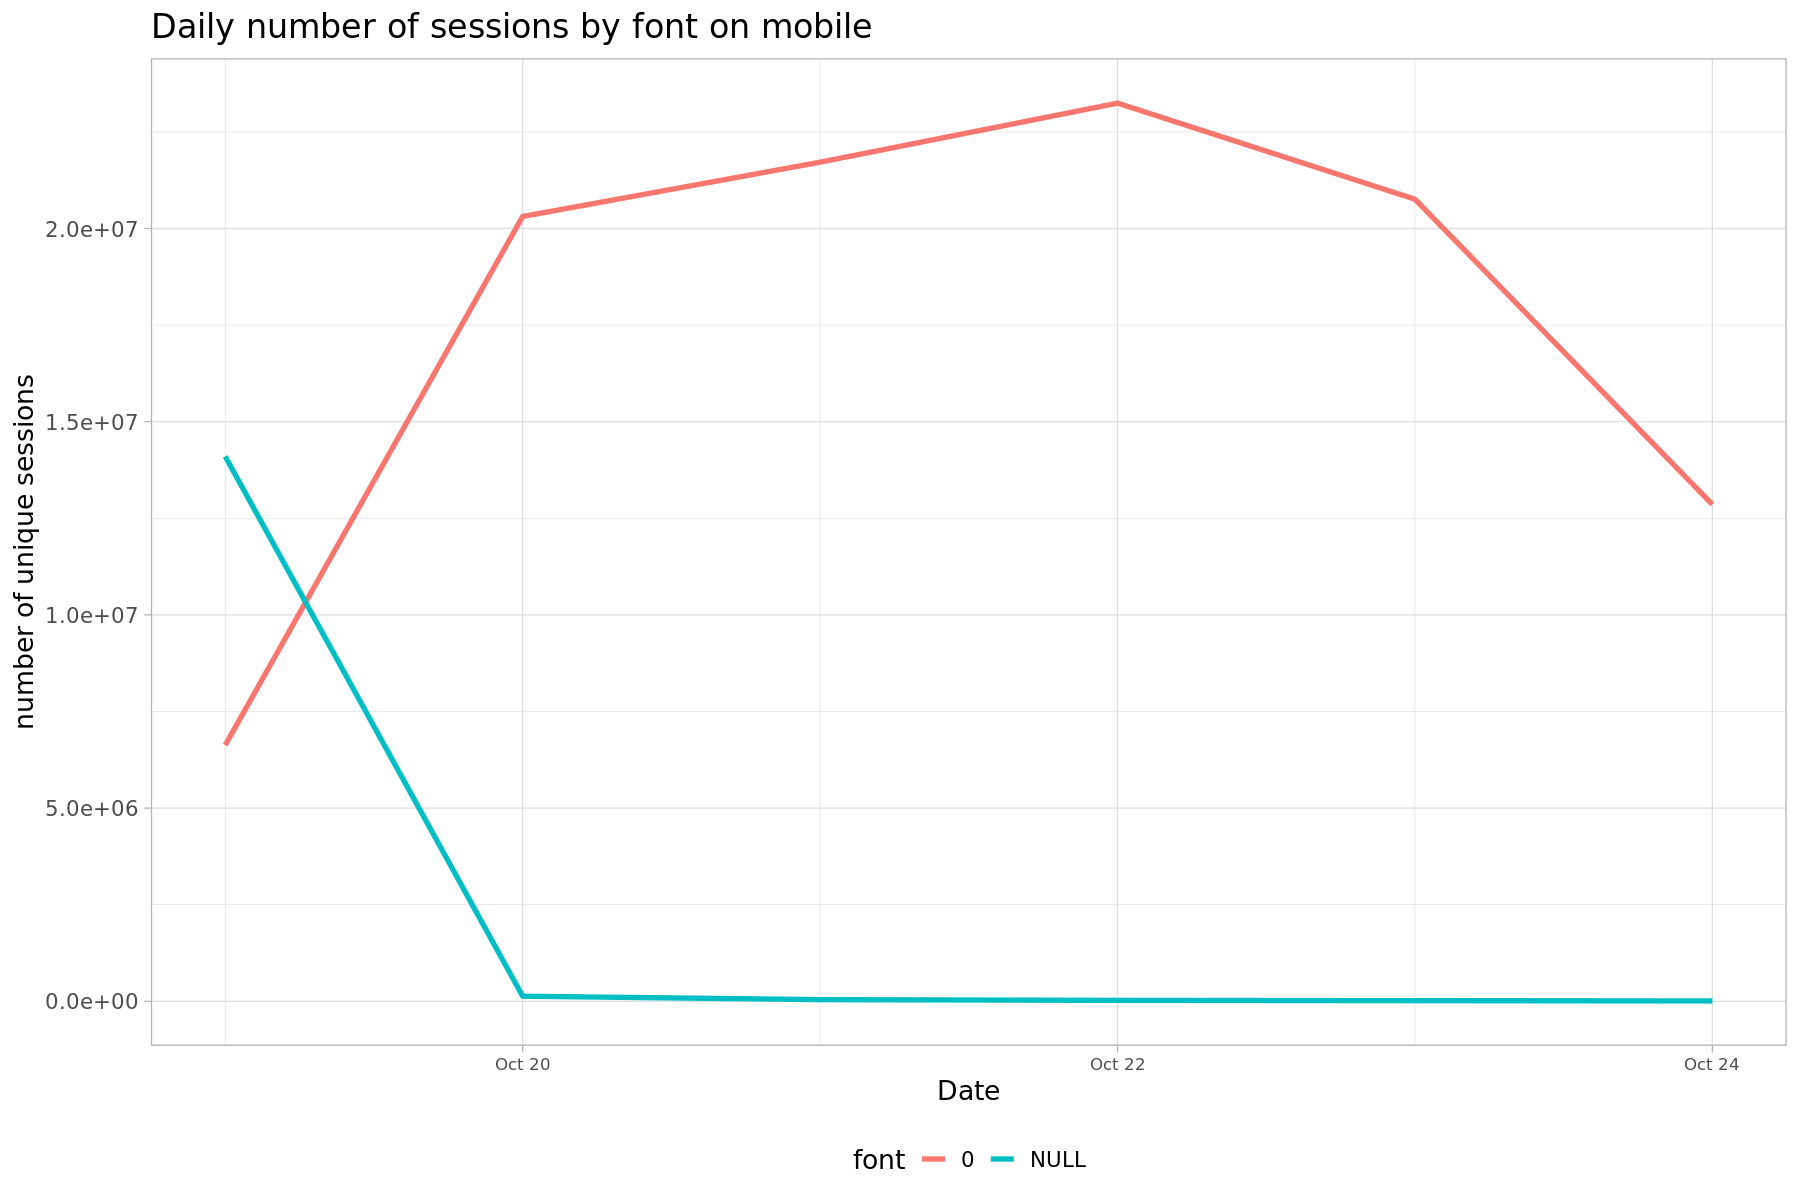

In [95]:
g_daily <- df_mobile_minerva_daily %>%
    ggplot(  mapping=aes(x=event_date, y= count_session, color=font)) +
geom_line( size = 1.5) +
labs(title = 'Daily number of sessions by font on mobile',
     x = 'Date',
     y = 'number of unique sessions') + 
theme_light(base_size = 16) +
theme(legend.position = "bottom", 
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20));
g_daily

### Note
- '0' should be the value for all event.font values until the patch containing the font values are merged. After the code is deployed, the font size will be caputured as below:  
0: small (current default)  
1: normal (new proposed default)  
2: large  
3: x-large  

- 'Null' should taper off eventually. 

In [122]:
query_desktop <- "
SELECT event.action , event.skin, event.isAnon, event.font, count(Distinct event.token) AS count_session, count(1) AS events
FROM event.desktopwebuiactionstracking
WHERE year=2023 and month=10 and day=23
GROUP BY event.action, event.skin, event.isAnon, event.font
ORDER BY event.action, event.skin, event.isAnon, event.font
LIMIT 10000
"

In [123]:
df_desktop <- wmfdata::query_hive(query_desktop)

Don't forget to authenticate with Kerberos using kinit



In [87]:
query_desktop_daily <- "
SELECT TO_DATE(dt) AS event_date,  event.font, count(Distinct event.token) AS count_session, count(1) AS events
FROM event.desktopwebuiactionstracking
WHERE year=2023 and month=10 and day > 18
AND  event.action='init' AND event.skin='vector-2022'
GROUP BY TO_DATE(dt), event.font
ORDER BY event_date
LIMIT 10000
"

In [88]:
df_desktop_daily <- wmfdata::query_hive(query_desktop_daily)

Don't forget to authenticate with Kerberos using kinit



In [90]:
df_desktop_daily$event_date <- as.Date(df_desktop_daily$event_date )

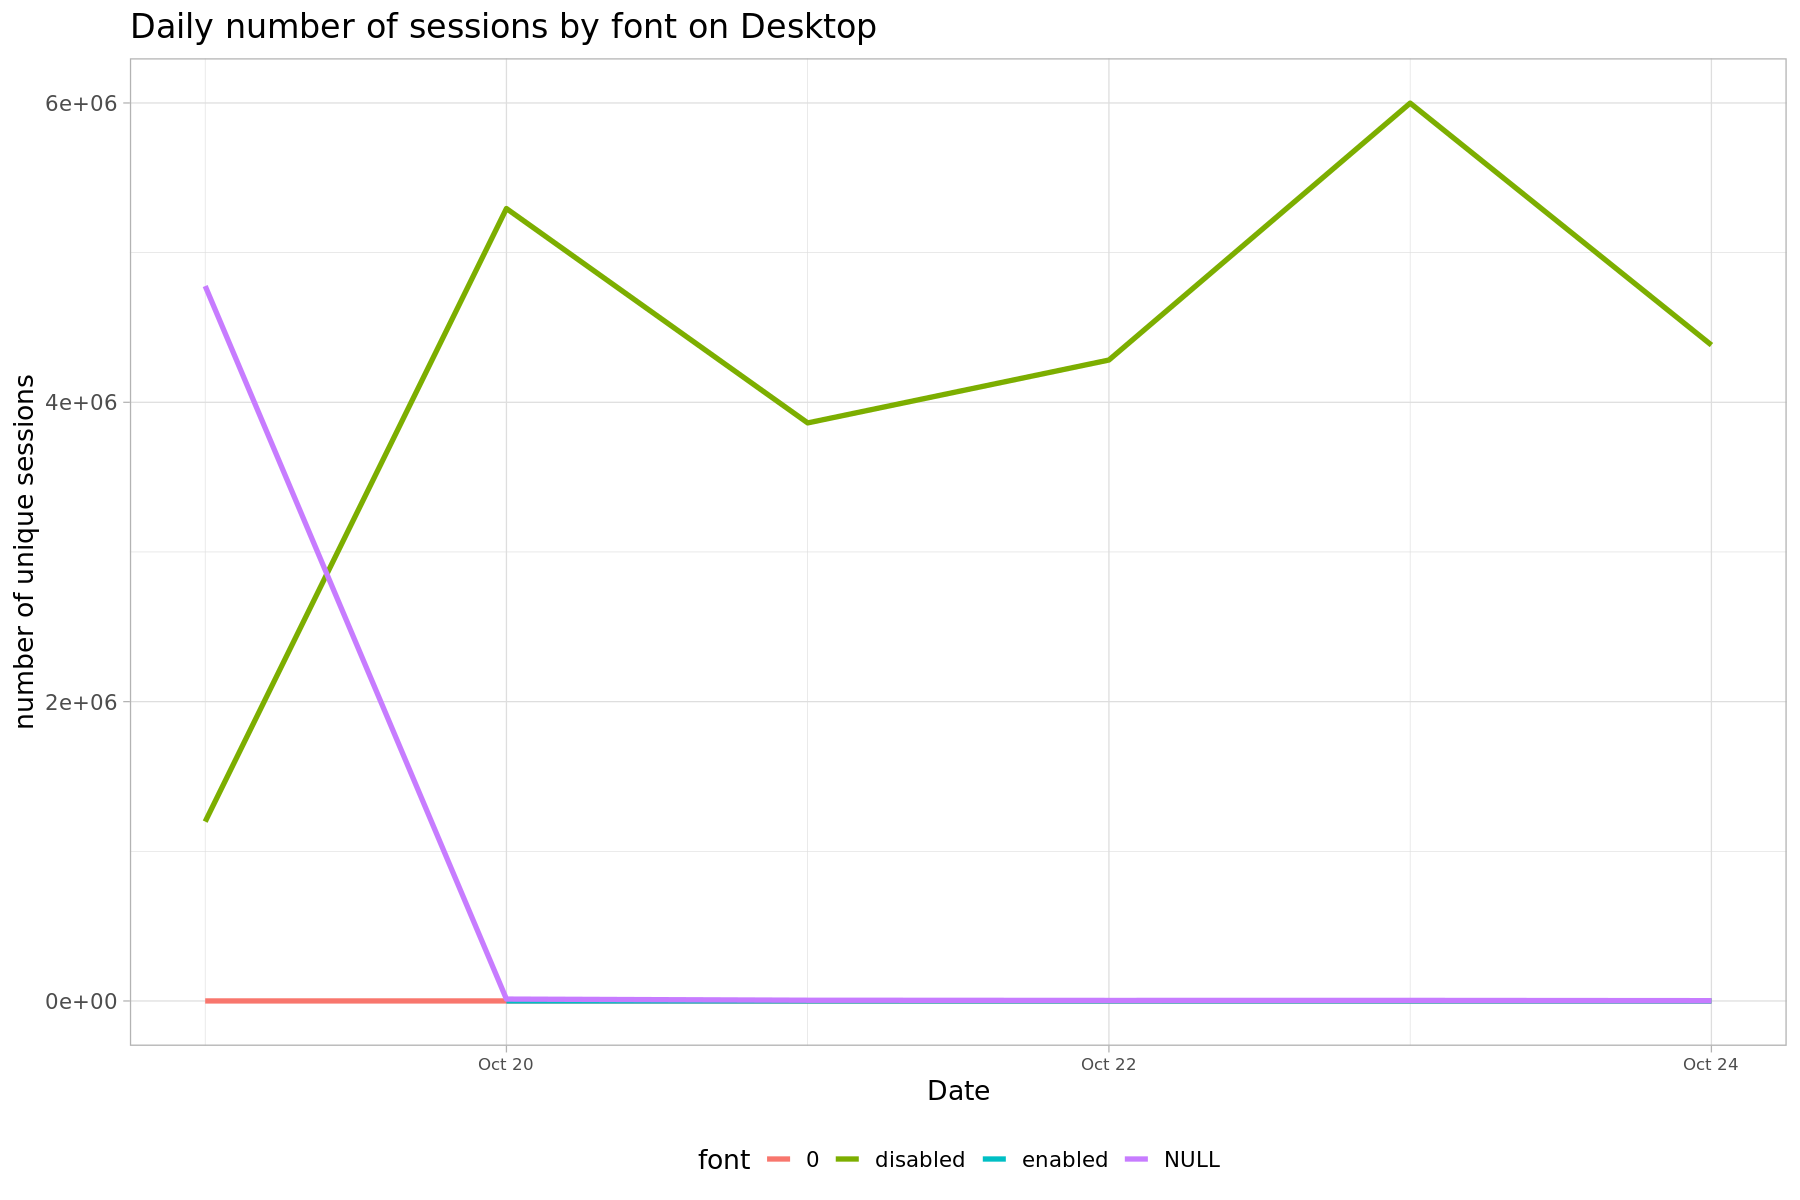

In [96]:
g_daily <- df_desktop_daily %>%
    ggplot(  mapping=aes(x=event_date, y= count_session, color=font)) +
geom_line( size = 1.5) +
labs(title = 'Daily number of sessions by font on Desktop',
     x = 'Date',
     y = 'number of unique sessions') + 
theme_light(base_size = 16) +
theme(legend.position = "bottom", 
     strip.text = element_text(size = 14, colour='black'),
     axis.text.x = element_text( size = 10 ),
     plot.title = element_text(size=20));
g_daily

### Note
`disabled` means that the font-size settings are available for this user, but it is currently disabled, which means they are unable to make font-size changes on their end.

### Conclusion:
The font features have not been deployed on mobile and desktop yet. It's too early to collect the baseline for  % of pageviews which have set a non-default font size in the Minerva skin (On mobile web)

# QA page previews in the Vector 2022 skin (or on desktop overall)

In [126]:
query_preview <- "
SELECT event.action , event.skin, event.isAnon, event.is_page_preview_on, count(Distinct event.token) AS count_session, count(1) AS events
FROM event.desktopwebuiactionstracking
WHERE year=2023 and month=10 and day=23
GROUP BY event.action, event.skin, event.isAnon, event.is_page_preview_on
ORDER BY event.action, event.skin, event.isAnon, event.is_page_preview_on
LIMIT 10000
"

In [127]:
df_preview <- wmfdata::query_hive(query_preview)

Don't forget to authenticate with Kerberos using kinit



In [60]:
#total number of sessions
1022348+9063710
1022348+9063710+4792181

[1] 10086058

[1] 14878239

### Number of sessions with preview off (non-default)/ total number of initialized sessions

In [59]:
1022348/(1022348+9063710)

[1] 0.1013625

# QA the default width option (and view the site at full width)

In [130]:
query_width <- "
SELECT event.action , event.skin, event.isAnon, event.is_full_width, count(Distinct event.token) AS count_session, count(1) AS events
FROM event.desktopwebuiactionstracking
WHERE year=2023 and month=10 and day=23
GROUP BY event.action, event.skin, event.isAnon, event.is_full_width
ORDER BY event.action, event.skin,event.isAnon, event.is_full_width
LIMIT 10000
"

In [131]:
df_width <- wmfdata::query_hive(query_width)

Don't forget to authenticate with Kerberos using kinit



In [61]:
# Total number of sessions

10050423 + 27295
10050423 + 27295 + 4792181

[1] 10077718

[1] 14869899

### Number of sessions with full_width on (non_default)/ total number of initialized sessions

In [140]:
7495/(5836579 + 7495)

[1] 0.001282496

# QA pageviews which a viewing a pinned/unpinned version of the menus on the site (main menu, table of contents, tools menu)

In [134]:
query_pinned <- "
SELECT event.action , event.skin, event.isAnon, event.is_pinned, count(Distinct event.token) AS count_session, count(1) AS events
FROM event.desktopwebuiactionstracking
WHERE year=2023 and month=10 and day=23
GROUP BY event.action, event.skin, event.isAnon, event.is_pinned
ORDER BY event.action, event.skin,  event.isAnon, event.is_pinned
LIMIT 10000
"

In [135]:
df_pinned <- wmfdata::query_hive(query_pinned)

Don't forget to authenticate with Kerberos using kinit



In [67]:
# total number of sessions
31481+10047139
31481+10047139+4792181


[1] 10078620

[1] 14870801

### Number of sessions with pin enabled (non-default?) / total number of initialized sessions

Anonymous users

In [138]:
5832259/(5832259+12310)

[1] 0.9978938

Logged-in users

In [139]:
155052/(155052+4994)

[1] 0.9687965

# QA disabled media viewer

In [153]:
query_media_viewer <- "
SELECT event.action , event.skin,event.isAnon, event.is_media_viewer_enabled, count(Distinct event.token) AS count_session, count(1) AS events
FROM event.desktopwebuiactionstracking
WHERE year=2023 and month=10 and day=23
GROUP BY event.action, event.skin, event.isAnon,event.is_media_viewer_enabled
ORDER BY event.action, event.skin, event.isAnon,event.is_media_viewer_enabled
LIMIT 10000
"

In [154]:
df_media_viewer <- wmfdata::query_hive(query_media_viewer)

Don't forget to authenticate with Kerberos using kinit



### Number of sessions with media viewer disabled (non-default) / total number of initialized sessions

In [71]:
#total session
10145+10066739
10145+10066739+4792181

[1] 10076884

[1] 14869065

In [72]:
10145/(10145+10066739)

[1] 0.00100676

# Dark mode on vector-2022 desktop

In [145]:
query_dark_mode <- "
SELECT event.action , event.skin,event.isAnon, event.is_dark_mode_on, event.is_dark_mode_prepared_by_os , count(Distinct event.token) AS count_session, count(1) AS events
FROM event.desktopwebuiactionstracking
WHERE year=2023 and month=10 and day=23
GROUP BY event.action, event.skin, event.isAnon, event.is_dark_mode_on, event.is_dark_mode_prepared_by_os
ORDER BY event.action, event.skin, event.isAnon, event.is_dark_mode_on, event.is_dark_mode_prepared_by_os
LIMIT 10000
"

In [146]:
df_dark_mode  <- wmfdata::query_hive(query_dark_mode)

Don't forget to authenticate with Kerberos using kinit



In [149]:
1061767/(4784703+1061767)

[1] 0.1816082

# Dark mode on Minerva Mobile

In [165]:
query_dark_mode_mobile <- "
SELECT event.action , event.isAnon, event.is_dark_mode_on, event.is_dark_mode_prepared_by_os , count(Distinct event.token) AS count_session, count(1) AS events
FROM event.MobileWebUIActionsTracking
WHERE year=2023 and month=10 and day =23
GROUP BY event.action, event.isAnon, event.is_dark_mode_on, event.is_dark_mode_prepared_by_os
ORDER BY event.action, event.isAnon, event.is_dark_mode_on, event.is_dark_mode_prepared_by_os
LIMIT 10000
"

In [166]:
df_dark_mode_mobile  <- wmfdata::query_hive(query_dark_mode_mobile)

Don't forget to authenticate with Kerberos using kinit

